-----

### Bank Marketing (Campaign)

<b>Business Problem:</b>

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).
Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

<b>The Data:</b>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

-----


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [8]:
# Load the dataset
df = pd.read_csv("dataset/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Shape of the data frame
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

------------------

<b> Week 7: Deliverables </b>

Business understanding

--------------------

<b>Columns Description</b>

- Customer Information: 

1 - age (numeric)

2 - job : type of job (categorical)

3 - marital : marital status (categorical)

4 - education : (categorical)

5 - default: has credit in default? (categorical)

6 - housing: has housing loan? (categorical)

7 - loan: has personal loan? (categorical)

- Communication Information:

8 - contact: contact communication type (categorical)

9 - month: last contact month of year (categorical)

10 - day_of_week: last contact day of the week (categorical)

11 - duration: last contact duration, in seconds (numeric)


- Campaign Information:

12 - campaign: number of contacts performed during this campaign and for this client (numeric)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical)

- social and economic context attributes:

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

- <b>Target</b>:

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [6]:
# Check the numeric columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Check the categorical columns

In [8]:
df["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [9]:
df["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [10]:
df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [11]:
df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [12]:
df["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [13]:
df["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [14]:
df["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [15]:
df["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [16]:
df["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [17]:
df["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [18]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

---------------------------

<b> Week 8: Deliverables </b>

What are the problems in the data ( number of NA values, outliers , skewed etc)

--------------------

- No null values
- Analyising each feature to find outliers and other problems with the data

### Univariate analysis
Analysing Communication & Campaign  Information 

Text(0.5, 1.0, 'Contact Counts')

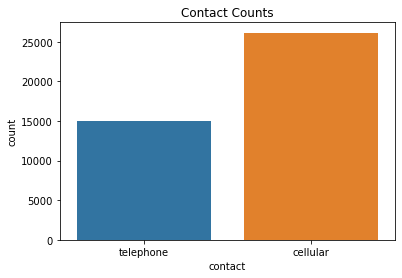

In [6]:
# contact 
sns.countplot(x ='contact' , data= df)
plt.title('Contact Counts')

Text(0.5, 1.0, 'Month Counts')

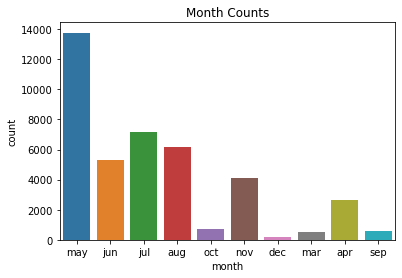

In [8]:
# month
sns.countplot(x ='month' , data= df)
plt.title('Month Counts')

Text(0.5, 1.0, 'Day Counts')

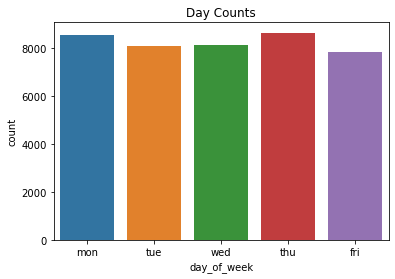

In [9]:
# day of the week
sns.countplot(x ='day_of_week' , data= df)
plt.title('Day Counts')

<AxesSubplot:xlabel='y', ylabel='duration'>

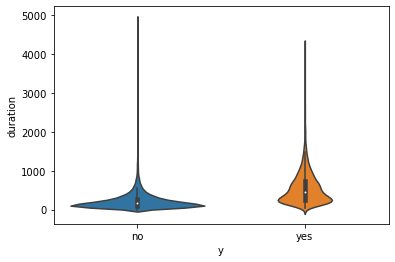

In [10]:
# Duration
sns.violinplot(x="y", y="duration", data=df, size=8)

Text(0.5, 1.0, 'Histogram of campaign')

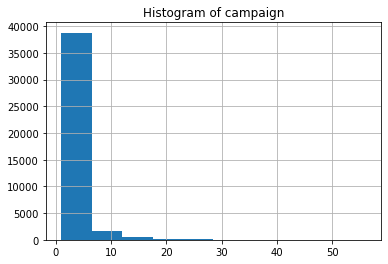

In [11]:
# campaign 
df['campaign'].hist()
plt.title('Histogram of campaign')

Text(0.5, 1.0, 'Histogram of pdays')

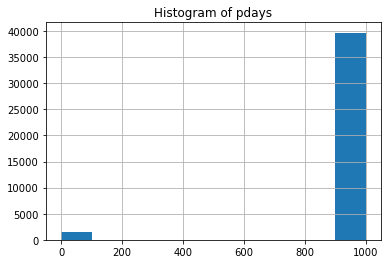

In [12]:
# pdays
df['pdays'].hist()
plt.title('Histogram of pdays')

Text(0.5, 1.0, 'Histogram of previous')

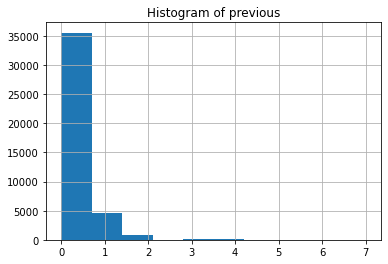

In [13]:
# previous 
df['previous'].hist()
plt.title('Histogram of previous')

---------------------------

<b> Week 9: Deliverables </b>

Data cleansing and transformation done on the data.

--------------------

-  No null values
- Categorical data encoding: pre-process categorical data from words to numeric value to use it in the model. To do this we will use OneHotEncoder() provided by sklearn.
- Encode the target column yes = 1 and no = 0

In [9]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode categorical data
df_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df = df.drop(cat_cols ,axis=1)
df = pd.concat([df_encoded, df], axis=1)

# Encode target value
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


---------------------------

<b> Week 10: Deliverables </b>

Exploratory Data Analysis (EDA)

--------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

c:\Users\assoma\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Load the dataset
df_eda = pd.read_csv("dataset/bank-additional-full.csv", sep=";")
df_eda.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df_eda.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Basics Summary:
- No null values
- The avarge age is 40, max is 98 and min is 17


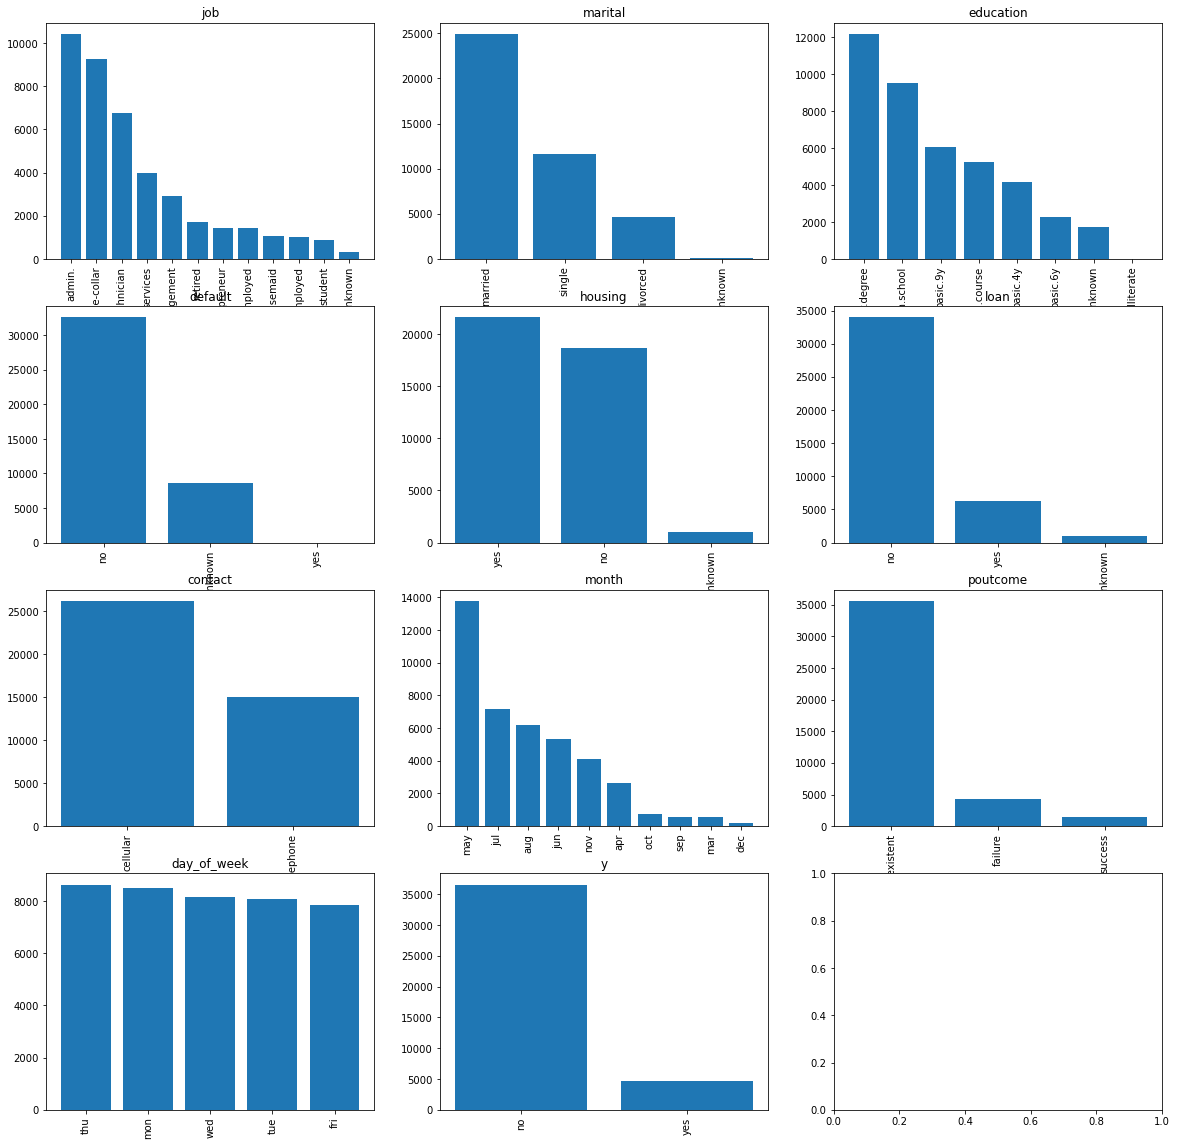

In [23]:
# Exploring categorical data
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome','day_of_week', 'y']

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 20))

counter = 0
for cat_column in cat_columns:
    value_counts = df_eda[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1


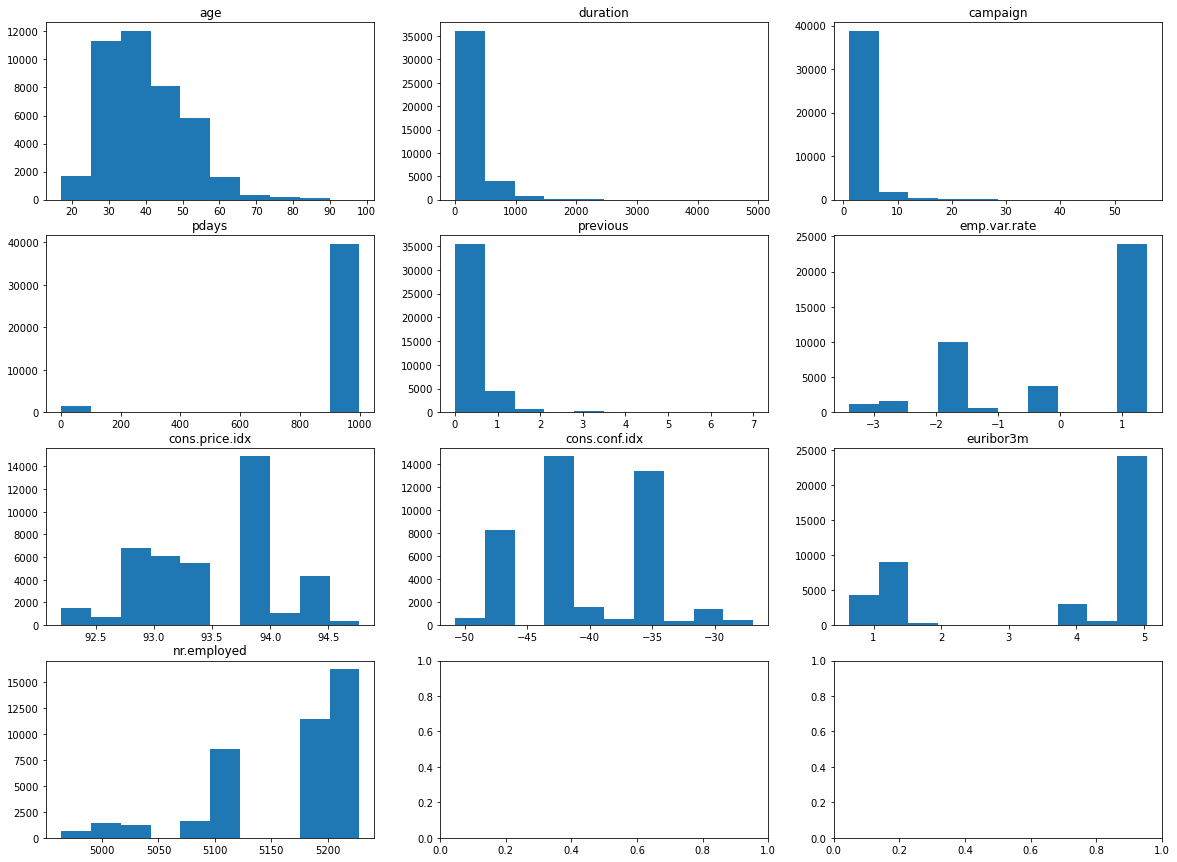

In [17]:
# Exploring numerical data

num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df_eda[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1


Analysing the Target column

Text(0.5, 1.0, 'Term Deposit Subcribers Count')

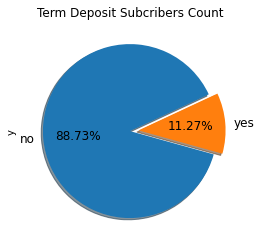

In [11]:
df_eda["y"].value_counts().plot.pie(explode=[0,0.10], autopct='%1.2f%%', shadow=True, fontsize=12, startangle=25)
plt.title('Term Deposit Subcribers Count')

Text(0.5, 1.0, 'Term Deposit Subcribers Job')

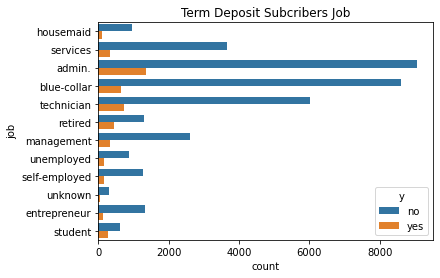

In [9]:
# Subcribers jobs
sns.countplot(y="job", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers Job')

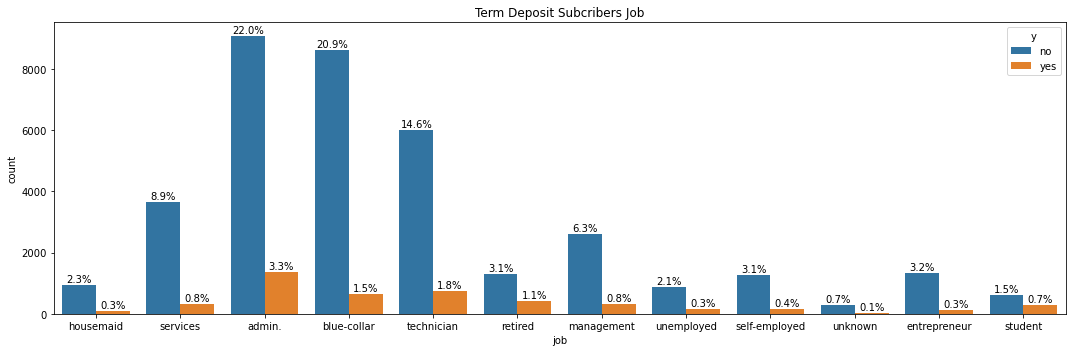

In [14]:
plt.figure(figsize=(15, 5))
ax=sns.countplot(x="job", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers Job')
total = len(df_eda)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Term Deposit Subcribers Education')

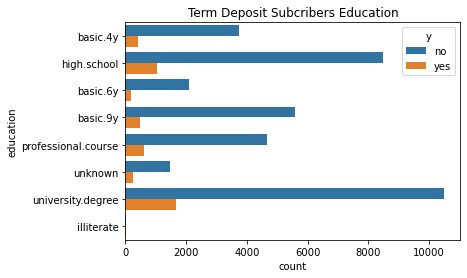

In [21]:
# Subcribers Education
sns.countplot(y="education", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers Education')

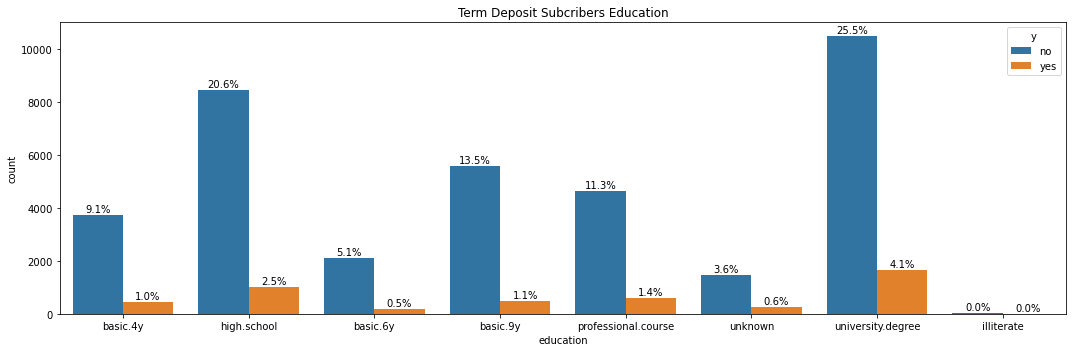

In [15]:
plt.figure(figsize=(15, 5))
ax=sns.countplot(x="education", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers Education')
total = len(df_eda)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Term Deposit Subcribers arital Status')

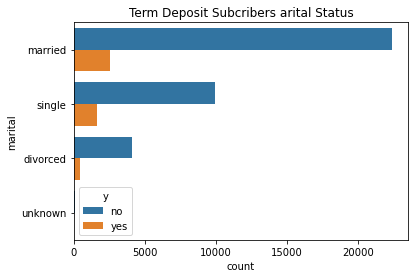

In [22]:
# Subcribers Marital Status
sns.countplot(y="marital", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers arital Status')

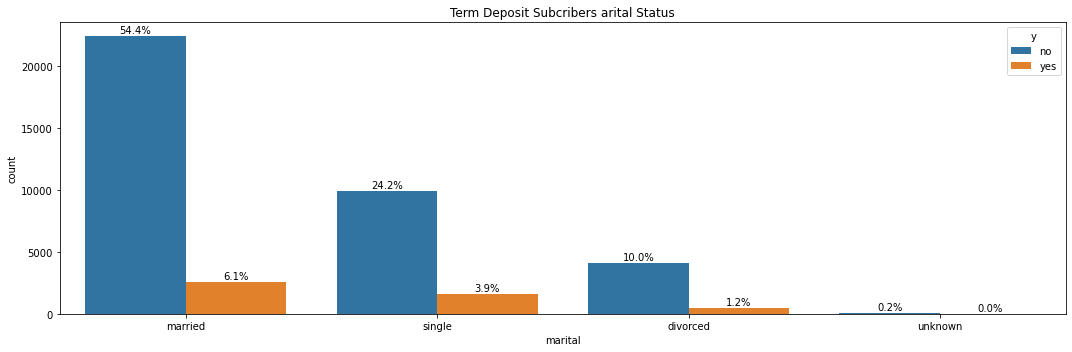

In [16]:
plt.figure(figsize=(15, 5))
ax=sns.countplot(x="marital", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers arital Status')
total = len(df_eda)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Term Deposit Subcribers vs Default Credit ')

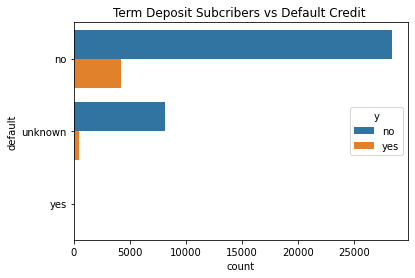

In [24]:
# Subcribers Default Credit 
sns.countplot(y="default", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers vs Default Credit ')

Text(0.5, 1.0, 'Term Deposit Subcribers vs Housing Loan')

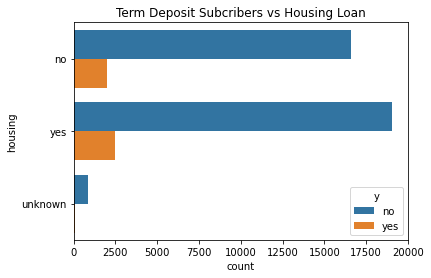

In [25]:
# Subcribers Housing Loan
sns.countplot(y="housing", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers vs Housing Loan')

Text(0.5, 1.0, 'Term Deposit Subcribers vs Personal loans')

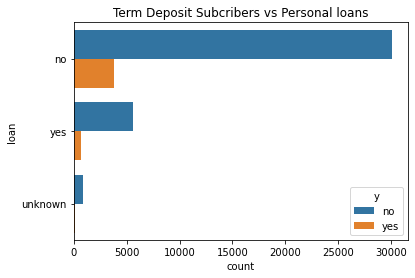

In [26]:
# Subcribers Personal loans
sns.countplot(y="loan", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers vs Personal loans')

Text(0.5, 1.0, 'Term Deposit Subcribers Contact Type ')

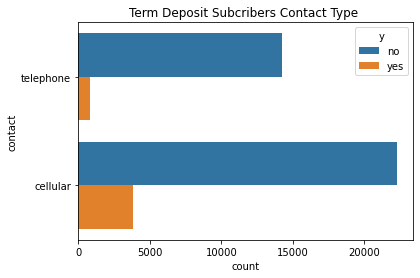

In [27]:
# Subcribers contact
sns.countplot(y="contact", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers Contact Type ')

Text(0.5, 1.0, 'Term Deposit Subcribers Contact Month ')

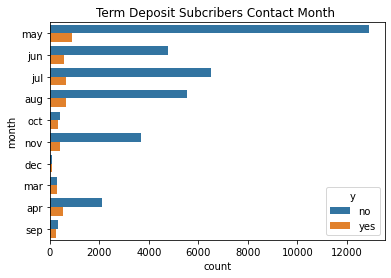

In [48]:
# Subcribers contact  month
sns.countplot(y="month", hue="y", data=df_eda)
plt.title('Term Deposit Subcribers Contact Month ')

Text(0.5, 1.0, 'Distribution of Term Deposit Subcribers Age')

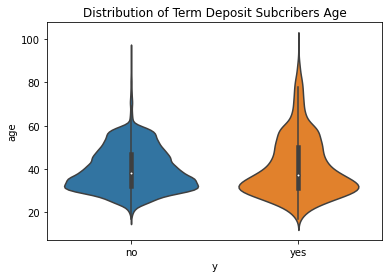

In [34]:
# Subcribers Age
sns.violinplot(x="y", y="age", data=df_eda)
plt.title('Distribution of Term Deposit Subcribers Age')

<AxesSubplot:>

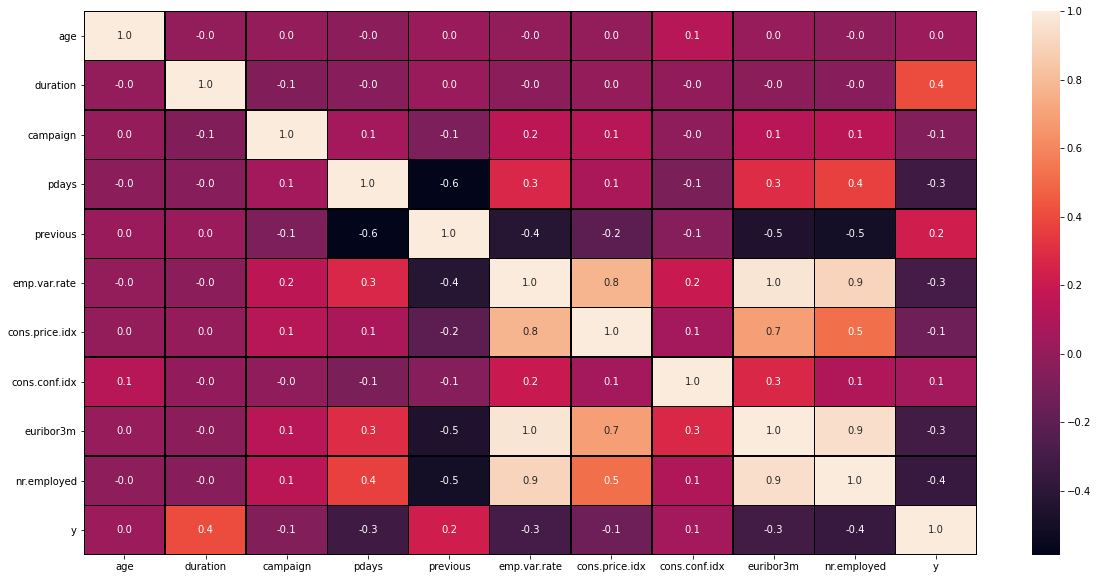

In [45]:
# Correlation plot

# Lable encode the target column
df_eda['y'] = df_eda['y'].apply(lambda x: 1 if x == 'yes' else 0)


plt.figure(figsize=(20,10))
sns.heatmap(df_eda.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f")

EDA Summary:
- Only 11.27% of The clients are subscribed to the term deposit.
- Administer and technician are the jobs with most subscribers to the term deposit.
- More subscriber to the term deposit with a university degree.
- Most clients are married so the number of the married subscribers is higher but relatively singles are less but subscribed more to the term deposit.
From the Correlation plot:
- Duration has high correlation with the target.
- Number of employees rate is highly correlated with employee variation rate
- Consumer price index is highly correlated with bank interest rate
- Employee variation rate also correlates with the bank interest rates

Recommendations:
- Profiling the clients help targeting the right group for the campaign: job(admin, technician), education(university degree).
- The month of the contact has an impact on the response of the clients (more clients subscribed on May).
- Increasing the call duration has an impact of the response to the campaign.

---------------------------

<b> Week 12: Deliverables </b>

Model Selection and Model Building

--------------------

In [45]:
import pandas as pd
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv("dataset/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Function to calculate the prevalence
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [4]:
df['Deposit'] = (df.y == 'yes').astype('int')
print('prevalence of the positive class: %.3f'%calc_prevalence(df['Deposit'].values))

prevalence of the positive class: 0.113


In [5]:
# Numeric
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']

In [6]:
# Categorical
# One-Hot Encoding
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
# Connect
df = pd.concat([df,cols_new_cat], axis = 1)
cols_all_cat=list(cols_new_cat.columns)
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
# Target
df['Deposit'] = (df.y == 'yes').astype('int')

In [9]:
# Dataframe
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['Deposit']]
df_data.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Deposit
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,0,...,0,0,1,0,0,0,0,1,0,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,0,...,0,0,1,0,0,0,0,1,0,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,1,...,0,0,1,0,0,0,0,1,0,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0


In [10]:
# Shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [11]:
# Split
df_valid_test=df_data.sample(frac=0.30,random_state=42)
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

# Train
df_train_all=df_data.drop(df_valid_test.index)

In [12]:
# Split the training data into positive and negative to balance the data
rows_pos = df_train_all.Deposit == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# Merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# Shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

In [13]:
# Split the validation into positive and negative
rows_pos = df_valid.Deposit == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop = True)

In [14]:
# Split the test into positive and negative
rows_pos = df_test.Deposit == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop = True)

In [15]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['Deposit'].values
y_valid = df_valid['Deposit'].values

In [16]:
# Scaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [17]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [18]:
# Model test function
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

thresh = 0.5

In [19]:
# Model selection
# KNN Classifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [20]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity, knn_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity, knn_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.797
accuracy:0.734
recall:0.604
precision:0.817
specificity:0.858
prevalence:0.500
f1:0.694
 
Validation:
AUC:0.779
accuracy:0.741
recall:0.601
precision:0.835
specificity:0.878
prevalence:0.500
f1:0.699
 


In [21]:
# Logistic Regression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [22]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity, lr_train_f1= print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity, lr_valid_f1= print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.797
accuracy:0.744
recall:0.633
precision:0.815
specificity:0.856
prevalence:0.500
f1:0.712
 
Validation:
AUC:0.798
accuracy:0.747
recall:0.632
precision:0.822
specificity:0.863
prevalence:0.500
f1:0.715
 


In [23]:
# Stochastic Gradient Descent
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

c:\Users\assoma\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [24]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity, sgdc_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity, sgdc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.792
accuracy:0.737
recall:0.646
precision:0.789
specificity:0.827
prevalence:0.500
f1:0.710
 
Validation:
AUC:0.800
accuracy:0.749
recall:0.648
precision:0.812
specificity:0.850
prevalence:0.500
f1:0.721
 


In [25]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [26]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity, nb_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity, nb_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.771
accuracy:0.693
recall:0.492
precision:0.822
specificity:0.893
prevalence:0.500
f1:0.615
 
Validation:
AUC:0.780
accuracy:0.702
recall:0.496
precision:0.844
specificity:0.908
prevalence:0.500
f1:0.625
 


In [27]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [28]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity, tree_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity, tree_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.864
accuracy:0.784
recall:0.668
precision:0.871
specificity:0.899
prevalence:0.500
f1:0.756
 
Validation:
AUC:0.748
accuracy:0.720
recall:0.611
precision:0.781
specificity:0.823
prevalence:0.500
f1:0.685
 


In [29]:
# Random Forest
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [30]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity, rf_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity, rf_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.813
accuracy:0.750
recall:0.632
precision:0.828
specificity:0.869
prevalence:0.500
f1:0.717
 
Validation:
AUC:0.795
accuracy:0.755
recall:0.642
precision:0.828
specificity:0.867
prevalence:0.500
f1:0.724
 


In [31]:
# Gradient Boosting Classifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [32]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity, gbc_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity, gbc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.900
accuracy:0.820
recall:0.766
precision:0.860
specificity:0.875
prevalence:0.500
f1:0.810
 
Validation:
AUC:0.777
accuracy:0.721
recall:0.684
precision:0.739
specificity:0.758
prevalence:0.500
f1:0.710
 


In [33]:
# Results
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,],
                          'f1':[knn_train_f1, knn_valid_f1,lr_train_f1,lr_valid_f1,sgdc_train_f1,sgdc_valid_f1,nb_train_f1,nb_valid_f1,tree_train_f1,tree_valid_f1,rf_train_f1,rf_valid_f1,gbc_train_f1,gbc_valid_f1,],
                          })

In [34]:
df_results

,classifier,data_set,auc,accuracy,recall,precision,specificity,f1
0,KNN,train,0.796962,0.734085,0.603832,0.816548,0.858158,0.694262
1,KNN,valid,0.779379,0.741059,0.600858,0.834990,0.878398,0.698835
2,LR,train,0.796603,0.744438,0.632880,0.814638,0.855995,0.712348
3,LR,valid,0.798059,0.747496,0.632332,0.821561,0.862661,0.714632
4,SGD,train,0.792486,0.736557,0.646168,0.788759,0.826947,0.710379
5,SGD,valid,0.799965,0.748927,0.648069,0.811828,0.849785,0.720764
6,NB,train,0.771106,0.692522,0.491656,0.821798,0.893387,0.615236
7,NB,valid,0.779663,0.702432,0.496423,0.844282,0.908441,0.625225
8,DT,train,0.864211,0.784456,0.667800,0.871020,0.898640,0.755991
9,DT,valid,0.748045,0.719599,0.610873,0.780622,0.822604,0.685393


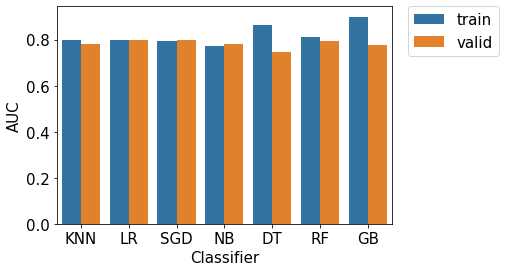

In [35]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

In [36]:
# Features Importance in GB
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [37]:
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.426433
cons.conf.idx,0.132930
euribor3m,0.101667
age,0.062249
campaign,0.029272


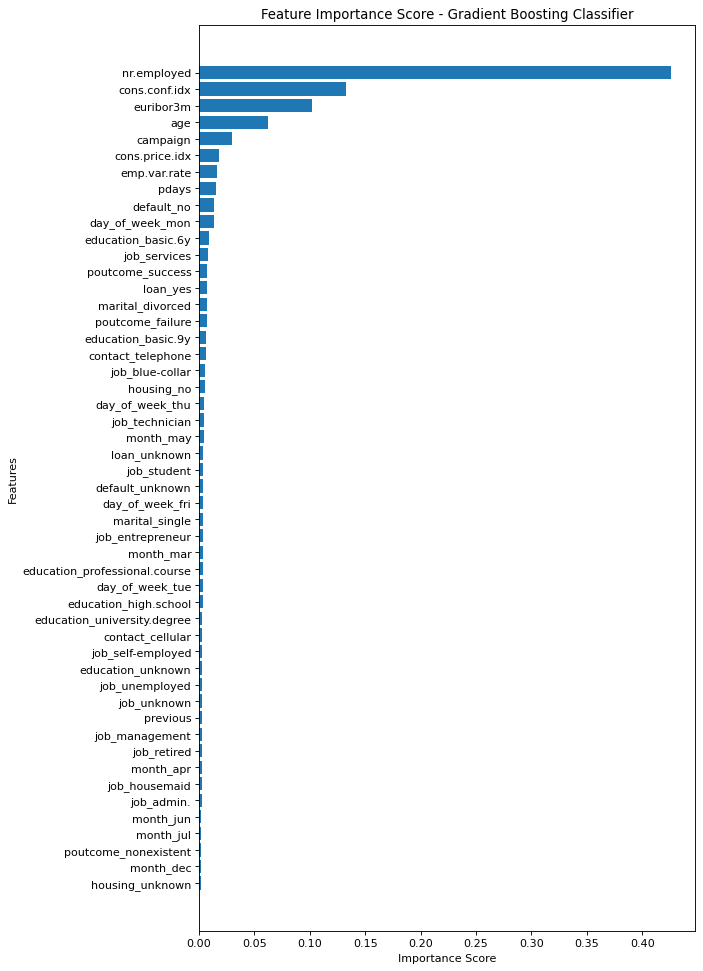

In [38]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

In [40]:
# Cross Validation 

# create a baseline model
gb = GradientBoostingClassifier()

# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid
random_grid = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

auc_scoring = make_scorer(roc_auc_score)

# create the randomized search cross-validation
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [41]:
gb_random.fit(X_train_tf, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': range(1, 5),
                                        'n_estimators': range(50, 200, 50)},
                   random_state=42, scoring=make_scorer(roc_auc_score),
                   verbose=1)

In [42]:
gb_random.best_params_

{'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.1}

In [44]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline GradientBoostingClassifier')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized GradientBoostingClassifier')
y_train_preds_random = gb_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gb_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline GradientBoostingClassifier
Training AUC:0.900
Validation AUC:0.777
Optimized GradientBoostingClassifier
Training AUC:0.817
Validation AUC:0.798


In [46]:
# Save the model
pickle.dump(gb_random.best_estimator_, open('gb_classifier.pkl', 'wb'),protocol = 4)

In [47]:
# load the model
model = pickle.load(open('gb_classifier.pkl','rb'))

In [48]:
# Let's predect the test set with the best model Gradient Boosting Classifier
X_test = df_test[cols_input].values
y_test = df_test['Deposit'].values

X_test_tf = scaler.transform(X_test)
y_test_preds = model.predict_proba(X_test_tf)[:,1]

print('Gradient Boosting Classifier')
print('Test:')
gbc_test_auc, gbc_test_accuracy, gbc_test_recall, gbc_test_precision, gbc_test_specificity, gbc_test_f1 = print_report(y_test,y_test_preds, thresh)


Gradient Boosting Classifier
Test:
AUC:0.795
accuracy:0.741
recall:0.620
precision:0.818
specificity:0.862
prevalence:0.500
f1:0.705
 
